In [1]:
# %pip install SQLAlchemy

# Exercice de recrutement pour Agrid

Importation des modules de base

In [2]:
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

sqlalchemy.__version__

'1.4.28'

Connection à la base de données et import des tables

In [3]:
from sqlalchemy  import create_engine
# import mysql.connector

db_type = "mysql"
driver = "mysqlconnector"
login = "root"
password = "MYSQLR00tP455w0rd!!!"
host = "localhost"
db_name = "client_main"

engine = create_engine(f"{db_type}+{driver}://{login}:{password}@{host}/{db_name}")

In [4]:
measures_query = "SELECT * FROM DataMeasurements"
sensors_query = "SELECT * FROM Sensors"

measures_df = pd.read_sql(measures_query, engine)
sensors_df = pd.read_sql(sensors_query, engine)

## Étude des jeux de données

### 1. Sensors_df

In [5]:
sensors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SensorId          114 non-null    int64  
 1   Name              114 non-null    object 
 2   Technical_Name    114 non-null    object 
 3   DataTypeId        114 non-null    int64  
 4   UnitId            114 non-null    int64  
 5   Active            114 non-null    int64  
 6   EquipmentId       114 non-null    int64  
 7   FatherId          0 non-null      object 
 8   IdLocal_Hub       0 non-null      object 
 9   SubType           114 non-null    object 
 10  Min               38 non-null     float64
 11  Max               38 non-null     float64
 12  List              57 non-null     object 
 13  TransmissionMode  114 non-null    object 
 14  DirectUrl         0 non-null      object 
 15  BoxId             0 non-null      object 
 16  IdLocal_Setup     0 non-null      object 
dt

Je peux voir d'emblée que les colonnes "FatherId", "IdLocal_Hub", "DirectUrl", "BoxId", "IdLocal_Setup" ne contiennent aucunes données. Je peux donc les droper pour faciliter mon analyse.

In [6]:
sensors_df.drop(["FatherId", "IdLocal_Hub", "DirectUrl", "BoxId", "IdLocal_Setup"], axis= 1, inplace= True)


In [7]:
pd. concat([sensors_df[30:36], sensors_df[102:108]])


,SensorId,Name,Technical_Name,DataTypeId,UnitId,Active,EquipmentId,SubType,Min,Max,List,TransmissionMode
30,31,InletTemp-sensor,InletTemp-sensor,227,3,1,6,numeric,16.0,32.0,None,history
31,32,SetTemp-sensor,SetTemp-sensor,226,3,1,6,numeric,16.0,32.0,None,history
32,33,Drive-sensor,Drive-sensor,228,8,1,6,binary,NaN,NaN,0|0;2|2,history
33,34,FanSpeed-sensor,FanSpeed-sensor,255,8,1,6,number,NaN,NaN,3003|3003;3005|3005,history
34,35,Mode-sensor,Mode-sensor,225,8,1,6,select,NaN,NaN,COOL|COOL;HEAT|HEAT;FAN|FAN,history
35,36,ErrCode-sensor,ErrCode-sensor,267,8,1,6,string,NaN,NaN,None,history
102,103,InletTemp-sensor,InletTemp-sensor,227,3,1,18,numeric,16.0,32.0,None,history
103,104,SetTemp-sensor,SetTemp-sensor,226,3,1,18,numeric,16.0,32.0,None,history
104,105,Drive-sensor,Drive-sensor,228,8,1,18,binary,NaN,NaN,0|0;2|2,history
105,106,FanSpeed-sensor,FanSpeed-sensor,255,8,1,18,number,NaN,NaN,3003|3003;3005|3005,history


Il semble n'y avoir qu'un certain nombre de valeurs pour chaque colonne. 

Je suppose fortement que "SensorId" soit une clé primaire donc chaque valeur devrait y être unique. Si c'est le cas, le nombre de valeurs uniques doit être égal au nombre d'individus.

Je vais mettre ça en évidence.

In [8]:
html = f"""<html>
            <head>
                <title>Résultats d'analyse des colonnes de Sensors</title>
                <meta charset='utf-8' />
            </head>
            <body>
                <div>"""

nb_ind = len(sensors_df)

html_tab = "&nbsp;&nbsp;&nbsp;&nbsp;"

html += f"""SensorId<br/>{html_tab}Il y a {sensors_df['SensorId'].nunique()} valeurs 
    uniques pour {nb_ind} entrées"""

for col in sensors_df.columns[1:]:
    html += f"<br/><br/>{col}"
    html += f"<br/>{html_tab}Nombre de valeurs uniques: {sensors_df[col].nunique()}"
    html += f"<br/>{html_tab}Valeurs uniques: \n\t{sensors_df[col].sort_values().unique()}"

html += f"""</div>
        </body>
    </html>"""

with open("./sensors_datas_analysis_results_0.html", "w") as file:
    file.write(html)


Les résultats se trouvent dans "./sensors_datas_analysis_results_0.html"

Il y a 6 capteurs uniques pour 19 équipements uniques, ce qui donne bien 144 entrées.

Je subodore que chaque équipement possède chaque capteur une fois et qu'ils doivent être tous les mêmes.

Après vérification, il semble bien que ce soit le cas. Je peux donc me concentrer sur un équipement.


In [9]:
equipmt = sensors_df[sensors_df["EquipmentId"] == 1]

equipmt

,SensorId,Name,Technical_Name,DataTypeId,UnitId,Active,EquipmentId,SubType,Min,Max,List,TransmissionMode
0,1,InletTemp-sensor,InletTemp-sensor,227,3,1,1,numeric,16.0,32.0,None,history
1,2,SetTemp-sensor,SetTemp-sensor,226,3,1,1,numeric,16.0,32.0,None,history
2,3,Drive-sensor,Drive-sensor,228,8,1,1,binary,NaN,NaN,0|0;2|2,history
3,4,FanSpeed-sensor,FanSpeed-sensor,255,8,1,1,number,NaN,NaN,3003|3003;3005|3005,history
4,5,Mode-sensor,Mode-sensor,225,8,1,1,select,NaN,NaN,COOL|COOL;HEAT|HEAT;FAN|FAN,history
5,6,ErrCode-sensor,ErrCode-sensor,267,8,1,1,string,NaN,NaN,None,history


1. Analyse des noms de colonnes:
   * "SensorId": id unique du capteur
   * "Name": nom du capteur
   * "Technical_Name": nom technique du capteur, idem à "Name"
   * "DataTypeId": id unique du type de la donnée, à vérifier mais sûr à 80-90%
   * "UnitId": l'id d'une unité, 
     * semble valoir 3 pour une valeur décimal
     * semble valoir 8 pour une binaire => 8 pour 1 octet?
   * "Active": probablement un booléen lié au fonctionnement de l'équipement, la valeur 1 est attribué à tous les individus, je suppose qu'ils sont tous en fonctionnement
   * EquipmentId: id unique de l'équipement
   * "SubType": type de la données au format alphanumérique
   * "Min": valeur minimum du capteur
     * semble être uniquement attribué aux capteurs thermiques
   * "Max": valeur maximale du capteur
     * semble être uniquement attribué aux capteurs thermiques
   * "List": listes des valeurs pouvant être utilisées/affichées? par le capteur
   * "TransmissionMode": ??? mais tous les individus valent "history", pas sûr que ça serve

2. Analyse des capteurs:
   * "InletTemp-sensor"
     * Capteurs de température
     * Type: numeric
     * Valeurs: [16, 32]
     * Pas de List
     * Rôle: Capteur de température à une entrée
   * "InletTemp-sensor", "SetTemp-sensor"
     * Capteurs de température
     * Type: numeric
     * Valeurs: [16, 32]
     * Pas de List
     * Rôle: Réglage de la température. /!\Quid de l'activation en mode manuel/auto?
   * "Drive-sensor"
     * Type: binaire
     * Valeurs: 0|0, 2|2
     * Pas de "Min", "Max"
     * Pilotage manuel ou automatique
     * Mode:
       * Manuel: "Raw"= 0|0, "Value"= 1
       * Automatique: "Raw"= 2|2, "Value"= 0
   * "FanSpeed-sensor"
     * Type: nombre
     * Valeurs: 3003|3003, 3005|3005
     * Pas de "Min", "Max"
     * Rôle: Capteur de la vitesse du ventilateur
     * /!\2 valeurs, serait-ce pour savoir si le ventilateur est allumé ou éteint?
   * "Mode-sensor"
     * Type: select
     * Valeurs: COOL|COOL;HEAT|HEAT;FAN|FAN
     * Pas de "Min", Max"
     * Rôle: Selection des modes clim, chauffage et ventilation
     * /!\Quid de l'activation du mode de "Mode-sensor" en auto/manuel?
   * "ErrCode-sensor"
     * Pas de données
     * Type: string
     * Probablement le message d'erreur


### 2. Measures_df

In [10]:
measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68090 entries, 0 to 68089
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DataMeasurementId  68090 non-null  int64         
 1   DateTime           68090 non-null  datetime64[ns]
 2   SensorId           68090 non-null  int64         
 3   Value              68070 non-null  float64       
 4   Raw                68090 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB


Il y a des valeurs null dans "Value".

In [11]:
null_val = measures_df[measures_df["Value"].isnull()]

null_val

,DataMeasurementId,DateTime,SensorId,Value,Raw
30392,30393,2021-10-31 22:38:55.351,17,NaN,Ventilation
30579,30580,2021-11-01 01:00:04.153,14,NaN,---
31000,31001,2021-11-01 05:00:04.147,14,NaN,---
31525,31526,2021-11-01 09:00:04.145,14,NaN,---
32071,32072,2021-11-01 13:00:04.167,14,NaN,---
32374,32375,2021-11-01 17:00:04.159,14,NaN,---
32643,32644,2021-11-01 21:00:04.091,14,NaN,---
32803,32804,2021-11-01 22:06:12.184,17,NaN,Chauffage
32817,32818,2021-11-01 22:08:30.274,17,NaN,Ventilation
32818,32819,2021-11-01 22:08:36.275,17,NaN,Chauffage


In [12]:
print(f"Valeurs uniques de 'SensorId'\n{null_val['SensorId'].unique()}")
print(f"Valeurs uniques de 'Raw'\n{null_val['Raw'].unique()}")

Valeurs uniques de 'SensorId'
[17 14 83]
Valeurs uniques de 'Raw'
['Ventilation' '---' 'Chauffage']


In [13]:
for id in null_val['SensorId'].unique():
    print(f"Sensor name: {sensors_df.loc[sensors_df['SensorId'] == id, ['SensorId', 'Name']]}")

Sensor name:     SensorId         Name
16        17  Mode-sensor
Sensor name:     SensorId            Name
13        14  SetTemp-sensor
Sensor name:     SensorId         Name
82        83  Mode-sensor


In [14]:
null_val.sort_values(by= "SensorId")

,DataMeasurementId,DateTime,SensorId,Value,Raw
30579,30580,2021-11-01 01:00:04.153,14,NaN,---
31000,31001,2021-11-01 05:00:04.147,14,NaN,---
31525,31526,2021-11-01 09:00:04.145,14,NaN,---
32071,32072,2021-11-01 13:00:04.167,14,NaN,---
32374,32375,2021-11-01 17:00:04.159,14,NaN,---
32643,32644,2021-11-01 21:00:04.091,14,NaN,---
30392,30393,2021-10-31 22:38:55.351,17,NaN,Ventilation
44379,44380,2021-11-08 21:56:28.388,17,NaN,Chauffage
44378,44379,2021-11-08 21:55:58.371,17,NaN,Ventilation
44372,44373,2021-11-08 21:53:34.281,17,NaN,Chauffage


Il y a donc des valeurs pour les capteurs n° 17 et 83 en français.

Je vais les droper pour l'analyse.

In [15]:
measures_df = measures_df[measures_df["Value"].notna()].reset_index(drop= True)
measures_df

,DataMeasurementId,DateTime,SensorId,Value,Raw
0,1,2021-10-18 10:13:28.415,1,19.1,19.1
1,2,2021-10-18 10:13:28.446,2,29.0,29.0
2,3,2021-10-18 10:13:28.469,4,4.0,3005
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT
4,5,2021-10-18 10:13:28.492,7,22.5,22.5
...,...,...,...,...,...
68065,68086,2021-11-21 15:49:49.258,13,21.9,21.9
68066,68087,2021-11-21 15:51:49.347,31,23.1,23.1
68067,68088,2021-11-21 15:51:49.386,49,26.0,26.0
68068,68089,2021-11-21 15:56:49.565,7,22.1,22.1


In [16]:
measures_df.head(10)

,DataMeasurementId,DateTime,SensorId,Value,Raw
0,1,2021-10-18 10:13:28.415,1,19.1,19.1
1,2,2021-10-18 10:13:28.446,2,29.0,29.0
2,3,2021-10-18 10:13:28.469,4,4.0,3005
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT
4,5,2021-10-18 10:13:28.492,7,22.5,22.5
5,6,2021-10-18 10:13:28.516,8,16.0,16.0
6,7,2021-10-18 10:13:28.526,9,0.0,2
7,8,2021-10-18 10:13:28.537,10,4.0,3005
8,9,2021-10-18 10:13:28.550,11,2.0,HEAT
9,10,2021-10-18 10:13:28.563,13,23.3,23.3


* DataMeasurementId: id unique de la mesure
* "DateTime": horaire de la mesure
* "SensorId: id du capteur, clé étreangère lié à sensors_df
* "Value": une valeur au format numérique
* "Raw": une valeur apparemment soit au format numérique soit string

"Value" et "Raw semblent très corrélés. Je vais regarder ça de plus près.


In [17]:
from sklearn.metrics import adjusted_rand_score

X_1 = measures_df["Value"] *10**3
X_1 = X_1.astype(np.int64)

adjusted_rand_score(X_1, measures_df["Raw"])

0.9881331136687914

Je suis quasiment sûr que les valeurs de "Value" correspondent aux valeurs "Raw".

Je vais extraire les données de l'équipement 1 et nommer les capteurs pour y voir plus clair.

In [18]:
meas_equip_1 = measures_df[measures_df["SensorId"].isin([1, 2, 3, 4, 5, 6])]

meas_equip_1["diff_time"] = pd.to_datetime(meas_equip_1['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)
meas_equip_1 = meas_equip_1.merge(sensors_df[["SensorId", "Name"]], on= "SensorId")
meas_equip_1 = meas_equip_1.sort_values(by= "DataMeasurementId").reset_index(drop= True)

meas_equip_1.head(50)


C:\Users\nanar\AppData\Local\Temp/ipykernel_9988/1829187625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas_equip_1["diff_time"] = pd.to_datetime(meas_equip_1['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)


,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name
0,1,2021-10-18 10:13:28.415,1,19.1,19.1,NaN,InletTemp-sensor
1,2,2021-10-18 10:13:28.446,2,29.0,29.0,0.031,SetTemp-sensor
2,3,2021-10-18 10:13:28.469,4,4.0,3005,0.023,FanSpeed-sensor
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT,0.012,Mode-sensor
4,260,2021-10-18 11:34:33.376,1,19.2,19.2,4864.895,InletTemp-sensor
5,275,2021-10-18 11:46:33.956,1,19.5,19.5,720.580,InletTemp-sensor
6,297,2021-10-18 11:52:34.274,1,19.3,19.3,360.318,InletTemp-sensor
7,305,2021-10-18 11:55:28.404,1,19.2,19.2,174.130,InletTemp-sensor
8,462,2021-10-18 13:48:33.538,1,19.3,19.3,6785.134,InletTemp-sensor
9,473,2021-10-18 14:00:03.961,1,19.3,19.3,690.423,InletTemp-sensor


Il semble y avoir un schéma régulier dans le déroulement du processus:
1. Capture de la température en entrée avec le capteur 1 "InletTemp-sensor"
2. Si la température est la même 2 fois d'affilées, activation du capteur 2 "SetTemp-sensor", puis du capteur 4 "FanSpeed-sensor", enfin du capteur 5 "Mode-sensor"

Je vais écrire un algo pour mettre en évidence l'hypothèse de processus précédente.

In [19]:
exceptions = pd.DataFrame([], columns= meas_equip_1.columns)

init_bool = True
# for i in range(len(meas_equip_1) - 5):
#     if init_bool:
#         prev_temp = meas_equip_1.loc[i, "Value"]
#         # print("1/", prev_temp)
#         init_bool = False
#     if meas_equip_1.loc[i, "Value"] == prev_temp \
#         and meas_equip_1.loc[i +1, "SensorId"] == 2 \
#         and meas_equip_1.loc[i +2, "SensorId"] == 4 \
#         and meas_equip_1.loc[i +3, "SensorId"] == 5:
#         prev_temp = meas_equip_1.loc[i +4, "Value"]
#         # print("2/", prev_temp, " idx: ", i+4)
#         # continue
#     elif meas_equip_1.loc[i, "Value"] == prev_temp \
#         and meas_equip_1.loc[i +2, "SensorId"] != 4:
#         for j in range(1, 10):
#             if meas_equip_1.loc[i +j, "SensorId"] == 1:
#                 idx = i + j
#                 prev_temp = meas_equip_1.loc[idx, "Value"]
#                 # print("3/", prev_temp, " idx: ", idx)
#                 exceptions = pd.concat([exceptions, meas_equip_1.iloc[i -1: idx, :]])
#                 break


for i in range(len(meas_equip_1) - 5):
    if init_bool:
        prev_temp = meas_equip_1.loc[i, "Value"]
        # print("1/", prev_temp)
        init_bool = False
    if meas_equip_1.loc[i, "SensorId"] == 1:
        if meas_equip_1.loc[i, "Value"] == prev_temp:
            # print("2/ ", prev_temp, "idx: ", i)
            # break
            if meas_equip_1.loc[i +1, "SensorId"] == 2 \
                and meas_equip_1.loc[i +2, "SensorId"] == 4 \
                and meas_equip_1.loc[i +3, "SensorId"] == 5:
                continue
                # print("2/ ", prev_temp, "idx: ", i+4)
                # print(meas_equip_1.iloc[i-1: i+4])
                # break
            else:
                for j in range(1, 10):
                    if meas_equip_1.loc[i +j, "SensorId"] == 1:
                        idx = i + j
                        # prev_temp = meas_equip_1.loc[idx, "Value"]
                        # print("3/", prev_temp, " idx: ", idx)
                        exceptions = pd.concat([exceptions, meas_equip_1.iloc[i: idx, :]])
                        break
        prev_temp = meas_equip_1.loc[i, "Value"]
                # break


In [20]:
exceptions

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name
316,7455,2021-10-21 16:36:54.170,1,20.6,20.6,913.735,InletTemp-sensor
317,7456,2021-10-21 16:36:54.189,2,29.0,29.0,0.019,SetTemp-sensor
318,7457,2021-10-21 16:36:54.203,3,0.0,2,0.014,Drive-sensor
319,7458,2021-10-21 16:36:54.219,4,4.0,3005,0.016,FanSpeed-sensor
320,7459,2021-10-21 16:36:54.235,5,2.0,HEAT,0.016,Mode-sensor
...,...,...,...,...,...,...,...
2831,67868,2021-11-21 13:00:04.163,1,20.1,20.1,75.713,InletTemp-sensor
2832,67869,2021-11-21 13:00:04.174,2,25.0,25.0,0.011,SetTemp-sensor
2833,67870,2021-11-21 13:00:04.184,3,0.0,2,0.010,Drive-sensor
2834,67871,2021-11-21 13:00:04.196,4,1.0,3003,0.012,FanSpeed-sensor


In [21]:
meas_equip_1[290:350]

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name
290,6938,2021-10-21 12:47:52.950,1,20.4,20.4,60.033,InletTemp-sensor
291,6941,2021-10-21 12:50:53.101,1,20.2,20.2,180.151,InletTemp-sensor
292,6950,2021-10-21 12:55:53.262,1,20.4,20.4,300.161,InletTemp-sensor
293,6954,2021-10-21 12:57:47.335,1,20.5,20.5,114.073,InletTemp-sensor
294,6958,2021-10-21 12:58:47.379,1,20.7,20.7,60.044,InletTemp-sensor
295,6961,2021-10-21 12:59:53.426,1,21.0,21.0,66.047,InletTemp-sensor
296,6964,2021-10-21 13:00:53.463,1,20.8,20.8,60.037,InletTemp-sensor
297,6990,2021-10-21 13:21:48.271,1,20.6,20.6,1254.808,InletTemp-sensor
298,7005,2021-10-21 13:35:54.763,1,20.8,20.8,846.492,InletTemp-sensor
299,7012,2021-10-21 13:48:49.238,1,20.6,20.6,774.475,InletTemp-sensor


In [22]:
meas_equip_1[meas_equip_1["SensorId"] == 6]

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name


3. Si la dernière température mesurée par capteur 1 < celle mesurée par la première du "tour", activation du capteur 3 "Drive-sensor" avec "Value"=0 et "Raw"=2 après activation du capteur 2

Pas de présence du capteur 6 "ErrCode-sensor" dans le sous-jeu de données.

J'ai pu voir aussi que les valeurs des capteurs 2 et 4 ssemblent changer en même temps.

In [23]:
exceptions.loc[exceptions["SensorId"] == 3, "Value"].unique()

array([0., 1.])

In [24]:
meas_equip_1.loc[(meas_equip_1["SensorId"] == 3) & (meas_equip_1["Value"] == 1), "Value"]


1098    1.0
1121    1.0
1159    1.0
1165    1.0
1172    1.0
       ... 
2357    1.0
2364    1.0
2370    1.0
2376    1.0
2524    1.0
Name: Value, Length: 97, dtype: float64

In [25]:
meas_equip_1.iloc[2500: 2530, :]

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name
2500,58658,2021-11-16 09:01:38.406,1,20.8,20.8,93.913,InletTemp-sensor
2501,58659,2021-11-16 09:01:38.420,2,19.0,19.0,0.014,SetTemp-sensor
2502,58660,2021-11-16 09:01:38.439,3,0.0,2,0.019,Drive-sensor
2503,58661,2021-11-16 09:01:38.454,4,1.0,3003,0.015,FanSpeed-sensor
2504,58662,2021-11-16 09:01:38.468,5,2.0,HEAT,0.014,Mode-sensor
2505,58763,2021-11-16 09:14:40.323,1,21.0,21.0,781.855,InletTemp-sensor
2506,58804,2021-11-16 10:09:42.653,1,20.8,20.8,3302.330,InletTemp-sensor
2507,58931,2021-11-16 13:00:04.420,1,20.8,20.8,10221.767,InletTemp-sensor
2508,58932,2021-11-16 13:00:04.430,2,19.0,19.0,0.010,SetTemp-sensor
2509,58933,2021-11-16 13:00:04.442,3,0.0,2,0.012,Drive-sensor


4. Si "diff_time" du capteur 3 > ~1 seconde, passage du capteur 3 à "Value"=1 et "Raw"=0, ce qui confirme que "Drive_sensor" est le pilotage auto/manuel.


Je vais tronquer les dates à la seconde et faire un graph affichant les variations des différents capteurs.

In [26]:
meas_equip_1["DateTime_s"] = meas_equip_1["DateTime"].astype("<M8[s]")
meas_equip_1

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
0,1,2021-10-18 10:13:28.415,1,19.1,19.1,NaN,InletTemp-sensor,2021-10-18 10:13:28
1,2,2021-10-18 10:13:28.446,2,29.0,29.0,0.031,SetTemp-sensor,2021-10-18 10:13:28
2,3,2021-10-18 10:13:28.469,4,4.0,3005,0.023,FanSpeed-sensor,2021-10-18 10:13:28
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT,0.012,Mode-sensor,2021-10-18 10:13:28
4,260,2021-10-18 11:34:33.376,1,19.2,19.2,4864.895,InletTemp-sensor,2021-10-18 11:34:33
...,...,...,...,...,...,...,...,...
2853,68008,2021-11-21 14:13:51.486,1,21.3,21.3,660.428,InletTemp-sensor,2021-11-21 14:13:51
2854,68040,2021-11-21 14:50:46.932,1,21.6,21.6,2215.446,InletTemp-sensor,2021-11-21 14:50:46
2855,68063,2021-11-21 15:08:47.641,1,21.8,21.8,1080.709,InletTemp-sensor,2021-11-21 15:08:47
2856,68069,2021-11-21 15:18:48.060,1,21.6,21.6,600.419,InletTemp-sensor,2021-11-21 15:18:48


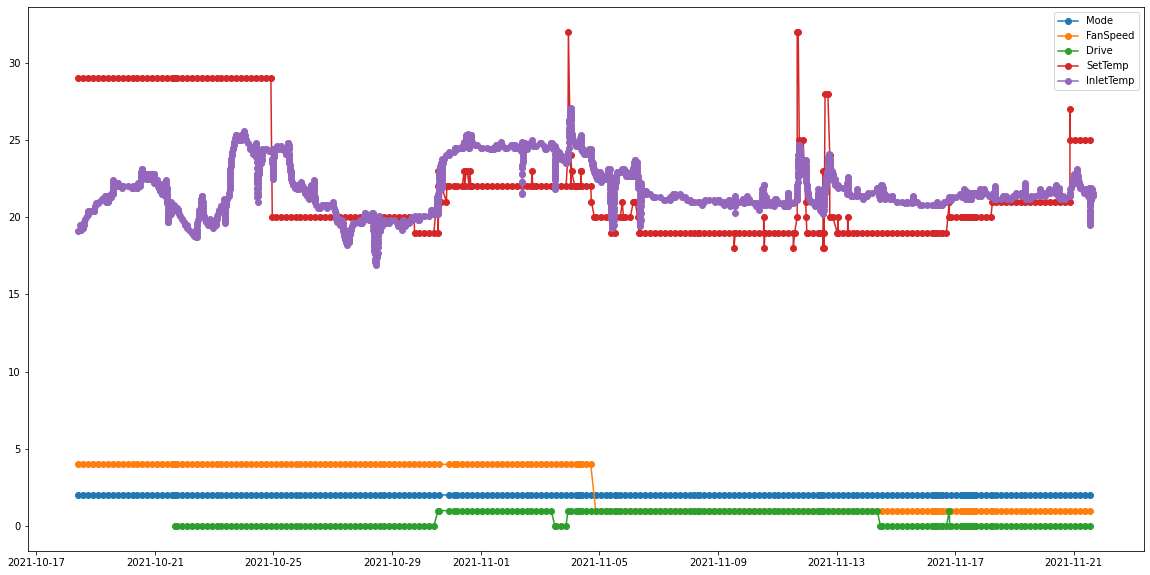

In [27]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(6)), reversed(labels)):
    capteur = meas_equip_1.loc[meas_equip_1["SensorId"] == i , ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.show()

Sauvegarde du jeu d'analyse et reprise de l'analyse du graph sur une nouvelle page.

In [28]:
meas_equip_1.to_csv("equipment_1.csv", index= False)

In [29]:
meas_equip_8 = measures_df[measures_df["SensorId"].isin([43, 44, 45, 46, 47, 48])]

meas_equip_8["diff_time"] = pd.to_datetime(meas_equip_8['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)
meas_equip_8 = meas_equip_8.merge(sensors_df[["SensorId", "Name"]], on= "SensorId")
meas_equip_8 = meas_equip_8.sort_values(by= "DataMeasurementId").reset_index(drop= True)

meas_equip_8["DateTime_s"] = meas_equip_8["DateTime"].astype("<M8[s]")
meas_equip_8

C:\Users\nanar\AppData\Local\Temp/ipykernel_9988/2207649283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas_equip_8["diff_time"] = pd.to_datetime(meas_equip_8['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)


,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
0,32,2021-10-18 10:13:28.858,43,24.7,24.7,NaN,InletTemp-sensor,2021-10-18 10:13:28
1,33,2021-10-18 10:13:28.869,44,25.0,25.0,0.011,SetTemp-sensor,2021-10-18 10:13:28
2,34,2021-10-18 10:13:28.889,46,4.0,3005,0.020,FanSpeed-sensor,2021-10-18 10:13:28
3,35,2021-10-18 10:13:28.903,47,2.0,HEAT,0.014,Mode-sensor,2021-10-18 10:13:28
4,88,2021-10-18 10:15:30.538,43,24.5,24.5,121.635,InletTemp-sensor,2021-10-18 10:15:30
...,...,...,...,...,...,...,...,...
3600,67907,2021-11-21 13:00:04.568,47,2.0,HEAT,0.009,Mode-sensor,2021-11-21 13:00:04
3601,67967,2021-11-21 13:04:48.706,43,23.5,23.5,284.138,InletTemp-sensor,2021-11-21 13:04:48
3602,67997,2021-11-21 13:46:50.411,43,23.7,23.7,2521.705,InletTemp-sensor,2021-11-21 13:46:50
3603,68038,2021-11-21 14:47:46.814,43,23.5,23.5,3656.403,InletTemp-sensor,2021-11-21 14:47:46


In [30]:
meas_equip_8.to_csv("equipment_8.csv", index= False)

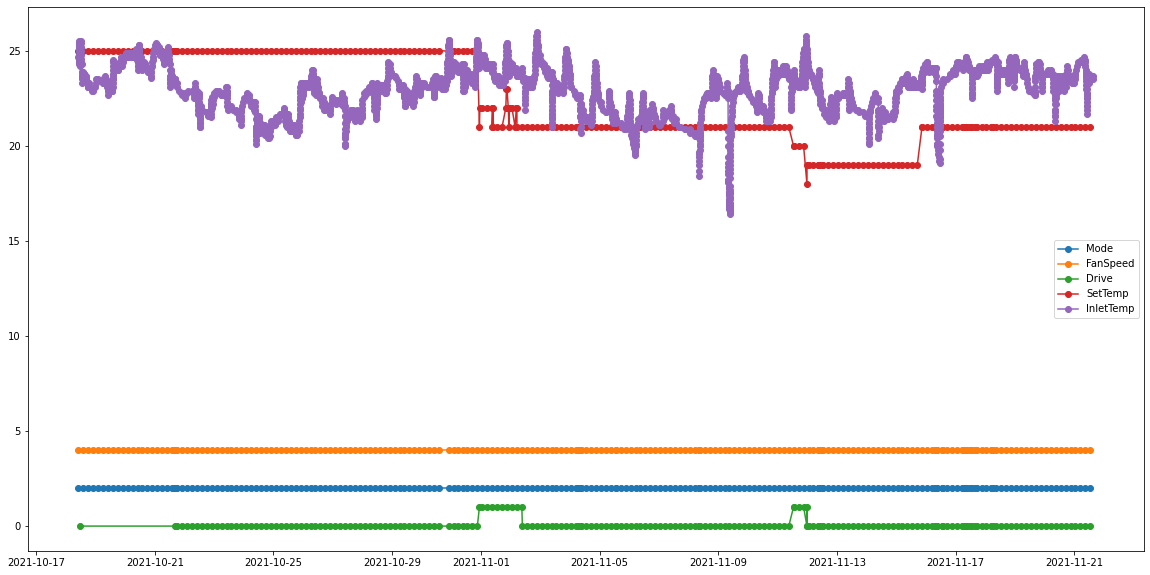

In [31]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(42, 48)), reversed(labels)):
    capteur = meas_equip_8.loc[meas_equip_8["SensorId"] == i , ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.show()

In [32]:
meas_equip_14 = measures_df[measures_df["SensorId"].isin([109, 110, 111, 112, 113, 114])]

meas_equip_14["diff_time"] = pd.to_datetime(meas_equip_14['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)
meas_equip_14 = meas_equip_14.merge(sensors_df[["SensorId", "Name"]], on= "SensorId")
meas_equip_14 = meas_equip_14.sort_values(by= "DataMeasurementId").reset_index(drop= True)

meas_equip_14["DateTime_s"] = meas_equip_14["DateTime"].astype("<M8[s]")
meas_equip_14

C:\Users\nanar\AppData\Local\Temp/ipykernel_9988/1514316054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas_equip_14["diff_time"] = pd.to_datetime(meas_equip_14['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)


,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
0,82,2021-10-18 10:13:29.528,109,20.0,20.0,NaN,InletTemp-sensor,2021-10-18 10:13:29
1,83,2021-10-18 10:13:29.539,110,23.0,23.0,0.011,SetTemp-sensor,2021-10-18 10:13:29
2,84,2021-10-18 10:13:29.560,112,4.0,3013,0.021,FanSpeed-sensor,2021-10-18 10:13:29
3,85,2021-10-18 10:13:29.576,113,2.0,HEAT,0.016,Mode-sensor,2021-10-18 10:13:29
4,264,2021-10-18 11:36:45.476,109,20.1,20.1,4995.900,InletTemp-sensor,2021-10-18 11:36:45
...,...,...,...,...,...,...,...,...
2135,67959,2021-11-21 13:00:05.217,110,19.0,19.0,0.011,SetTemp-sensor,2021-11-21 13:00:05
2136,67960,2021-11-21 13:00:05.228,111,0.0,2,0.011,Drive-sensor,2021-11-21 13:00:05
2137,67961,2021-11-21 13:00:05.238,112,2.0,3011,0.010,FanSpeed-sensor,2021-11-21 13:00:05
2138,67962,2021-11-21 13:00:05.249,113,2.0,HEAT,0.011,Mode-sensor,2021-11-21 13:00:05


In [33]:
meas_equip_14.to_csv("equipment_14.csv", index= False)

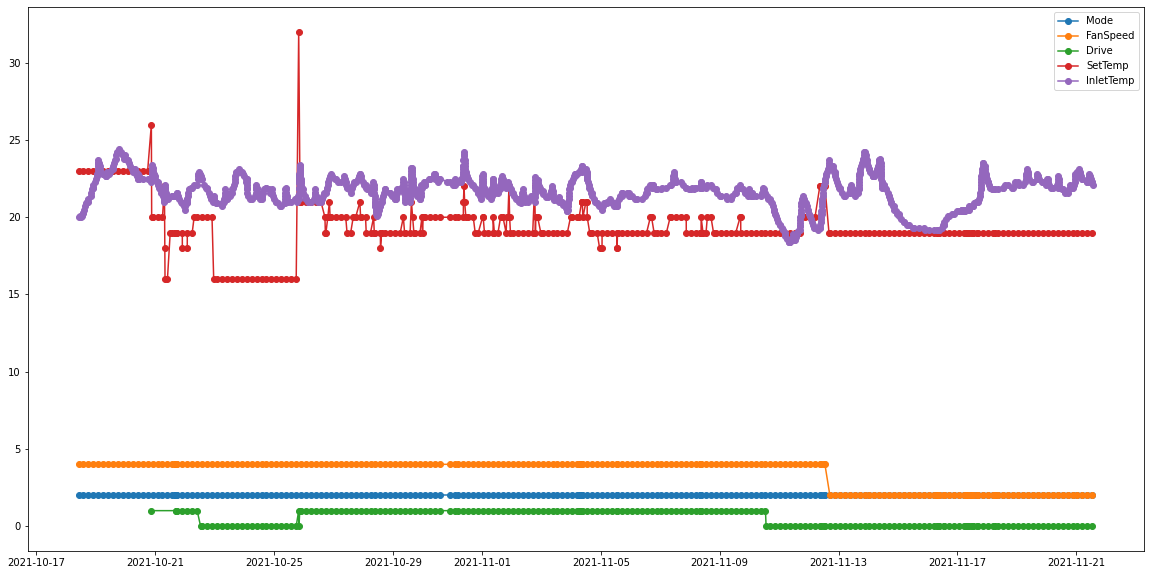

In [34]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(108, 114)), reversed(labels)):
    capteur = meas_equip_14.loc[meas_equip_14["SensorId"] == i , ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.show()

In [35]:
meas_equip_11 = measures_df[measures_df["SensorId"].isin(range(10 *6 +1, 11 *6 +1))]

meas_equip_11["diff_time"] = pd.to_datetime(meas_equip_11['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)
meas_equip_11 = meas_equip_11.merge(sensors_df[["SensorId", "Name"]], on= "SensorId")
meas_equip_11 = meas_equip_11.sort_values(by= "DataMeasurementId").reset_index(drop= True)

meas_equip_11["DateTime_s"] = meas_equip_11["DateTime"].astype("<M8[s]")
meas_equip_11

C:\Users\nanar\AppData\Local\Temp/ipykernel_9988/1491592684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas_equip_11["diff_time"] = pd.to_datetime(meas_equip_11['DateTime'].astype(str)).diff(1).dt.total_seconds() #.div(60)


,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
0,44,2021-10-18 10:13:29.030,61,22.0,22.0,NaN,InletTemp-sensor,2021-10-18 10:13:29
1,45,2021-10-18 10:13:29.042,62,27.0,27.0,0.012,SetTemp-sensor,2021-10-18 10:13:29
2,46,2021-10-18 10:13:29.056,63,0.0,2,0.014,Drive-sensor,2021-10-18 10:13:29
3,47,2021-10-18 10:13:29.069,64,1.0,3003,0.013,FanSpeed-sensor,2021-10-18 10:13:29
4,48,2021-10-18 10:13:29.082,65,2.0,HEAT,0.013,Mode-sensor,2021-10-18 10:13:29
...,...,...,...,...,...,...,...,...
4015,67985,2021-11-21 13:27:49.702,61,23.3,23.3,1664.901,InletTemp-sensor,2021-11-21 13:27:49
4016,68022,2021-11-21 14:32:52.271,61,23.1,23.1,3902.569,InletTemp-sensor,2021-11-21 14:32:52
4017,68034,2021-11-21 14:43:46.645,61,23.3,23.3,654.374,InletTemp-sensor,2021-11-21 14:43:46
4018,68046,2021-11-21 14:54:53.138,61,23.1,23.1,666.493,InletTemp-sensor,2021-11-21 14:54:53


In [36]:
meas_equip_14.to_csv("equipment_11.csv", index= False)

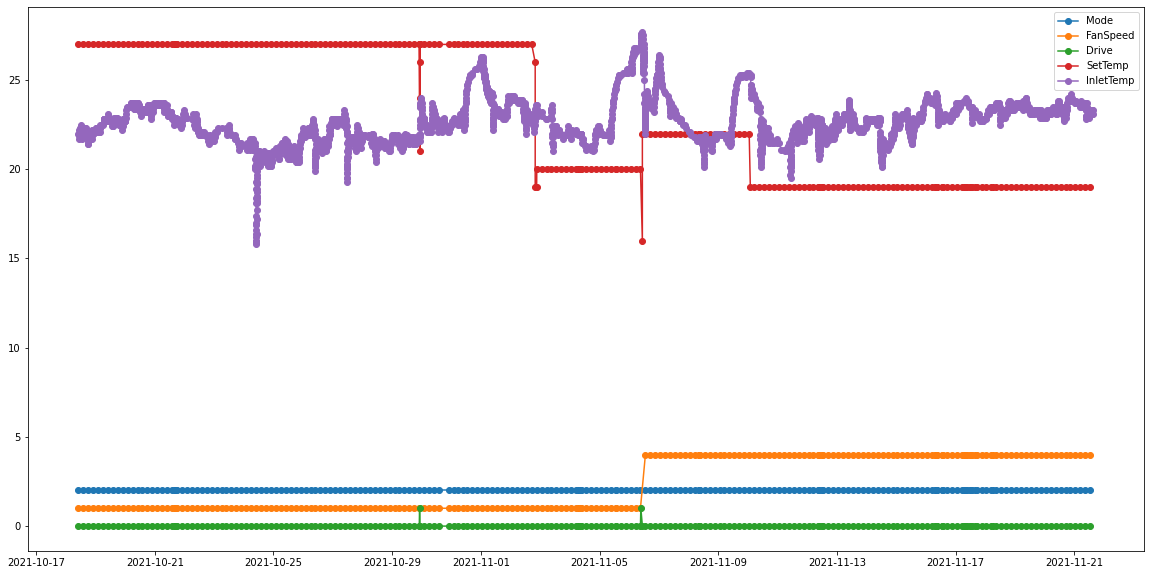

In [37]:
fig = plt.figure(figsize=(20, 10))

labels= ["InletTemp", "SetTemp", "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(60, 66)), reversed(labels)):
    capteur = meas_equip_11.loc[meas_equip_11["SensorId"] == i , ["Value", "DateTime_s"]]
    plt.plot_date("DateTime_s", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.show()

In [38]:
meas_equip_11[:50]

,DataMeasurementId,DateTime,SensorId,Value,Raw,diff_time,Name,DateTime_s
0,44,2021-10-18 10:13:29.030,61,22.0,22.0,NaN,InletTemp-sensor,2021-10-18 10:13:29
1,45,2021-10-18 10:13:29.042,62,27.0,27.0,0.012,SetTemp-sensor,2021-10-18 10:13:29
2,46,2021-10-18 10:13:29.056,63,0.0,2,0.014,Drive-sensor,2021-10-18 10:13:29
3,47,2021-10-18 10:13:29.069,64,1.0,3003,0.013,FanSpeed-sensor,2021-10-18 10:13:29
4,48,2021-10-18 10:13:29.082,65,2.0,HEAT,0.013,Mode-sensor,2021-10-18 10:13:29
5,95,2021-10-18 10:18:30.652,61,21.9,21.9,301.570,InletTemp-sensor,2021-10-18 10:18:30
6,110,2021-10-18 10:21:30.694,61,21.7,21.7,180.042,InletTemp-sensor,2021-10-18 10:21:30
7,150,2021-10-18 10:40:31.357,61,21.9,21.9,1140.663,InletTemp-sensor,2021-10-18 10:40:31
8,156,2021-10-18 10:42:31.450,61,22.0,22.0,120.093,InletTemp-sensor,2021-10-18 10:42:31
9,165,2021-10-18 10:46:31.548,61,21.9,21.9,240.098,InletTemp-sensor,2021-10-18 10:46:31
